In [9]:
# max distribution of n dice roll  (n:1,2,3)
# 
# TakaDoi 2021-06-26 

# Reload all modules (except those excluded by %aimport) 
%load_ext autoreload
%autoreload 2

# Clear variables (forced)
%reset -f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Matplot lib setup
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context('paper')

# sns.set_style('whitegrid')
# sns.set_style('dark')

In [11]:
# Free parameters 
num_simulations = 10000

In [12]:
# Fixed parameters 
max_dice_roll = 6
num_dice_roll = [1,2,3]

In [13]:
df = pd.DataFrame()
dict_df = []
for n in num_dice_roll:
    r = np.random.randint(max_dice_roll, size=(num_simulations, n)) # random integer samples [0-5] 
    r = r+1 # make it to a die roll number
    m = np.amax(r, axis=1) # take max along n-roll axis 
    # print(r) 
    # print('max', m)
    # print('--------')
    
    col_name = 'N' + str(n) + '_Dice_Roll'
    df[col_name] = m
    dict_df.append('# of rolled dice =' + str(n))

In [14]:
df.describe()

,N1_Dice_Roll,N2_Dice_Roll,N3_Dice_Roll
count,10000.000000,10000.000000,10000.000000
mean,3.456300,4.466900,4.965500
std,1.708796,1.401464,1.143521
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,4.000000
50%,3.000000,5.000000,5.000000
75%,5.000000,6.000000,6.000000
max,6.000000,6.000000,6.000000


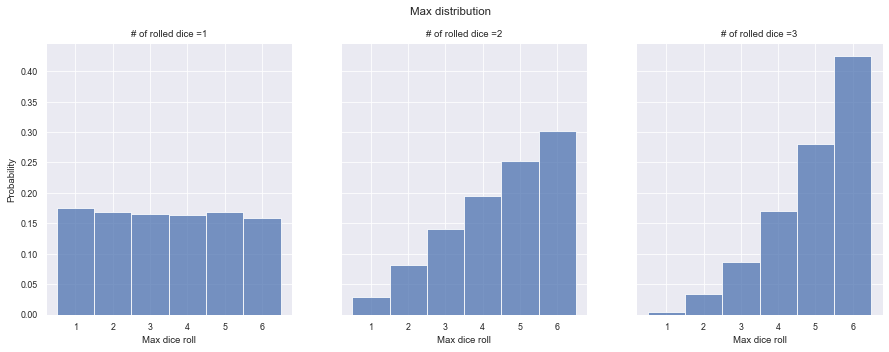

In [15]:
# Plotting 
num_rows = 1
num_cols = len(num_dice_roll) 
fig, axes = plt.subplots(num_rows, num_cols, figsize = (15,5), sharey=True)
fig.suptitle('Max distribution')

i = 0
for (col_name, col_data) in df.iteritems():
    sns.histplot(data=df, x = col_name, discrete=True, stat='probability', ax=axes[i])
    axes[i].set_title(dict_df[i])
    axes[i].set_xlabel('Max dice roll')
    i+=1